<h1>EDA - Análisis del uso de la flota de robots</h1>
Presentado por: Mitchel Esteban Collazos

<h1>Tabla de contenido</h1>
<ul>
  <li><b>Contexto</b>
  <ul>
    <li>Descripción del dataset
    <li>Pregunta SMART
    <li>Diccionario de datos
    <li>Hipótesis
    <li>Objetivo del análisis
  </ul>
</ul>
<ul>
  <li><b>Análisis exploratorio</b>
  <ul>
    <li>Análisis de estructura de campos
    <li>Análisis univariado
    <li>Análisis multivariado
    <li>Análisis de outliers
  </ul>
</ul>
<ul>
  <li><b>Preparación de los datos</b>
  <ul>
    <li>Imputación de valores perdidos
    <li>Análisis de la variable objetivo
    <li>Feature Engineering
  </ul>
  <li><b>Algoritmo básico</b>
  <li><b>Conclusiones</b>
</ul>

# Contexto

Avidbots se dedica al diseño, fabricación, venta y soporte de robots móviles autónomos (AMR) para la limpieza de suelos en espacios grandes. La empresa tiene su oficina principal en Kitchener, Ontario, Canada, y tiene oficinas en Chicago, Hong Kong, Japón, Corea del sur, India y Colombia. Su principal producto, el robot NEO, opera en aeropuertos, bodegas, sitios de manufactura, centros comerciales, universidades y otros espacios comerciales alrededor del mundo.

Link: https://avidbots.com/company/about/

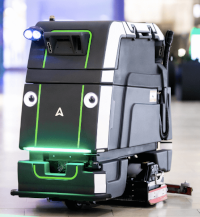

> *Fig. 1. Robot NEO*




El usuario tiene acceso a la plataforma Command Center la cual le permite gestionar su propia flota de robots, realizar el monitoreo remoto en tiempo real y comparar métricas.

## Descripcion del dataset

El siguiente dataset contiene los **resultados de la ejecución de los planes de limpieza de la flota de robots NEO** de **Diciembre de 2023 a Febrero de 2024**. Cada robot genera un reporte después de haber ejecutado un plan de limpieza que contiene las siguientes métricas:
* **hours_cleaned:** Duración del plan en horas.
* **covered_area_(sqft):** Área cubierta en pies cuadrados.
* **performance_(sqft/hr):** La razón entre el área cubierta por el tiempo de operación.
* **water_usage_(lt):** Uso de agua en litros.
* **coverage_rate(%):** Razón entre el área cubierta sobre el área total del plan.
* **resultado del reporte:** Cada reporte se clasifica como "Successful", "Partial", "Cancelled by Operator" y "Cancelled by RA" (Exitoso, Parcial, Cancelado in situ, Cancelado remotamente)

## Pregunta SMART

1. ¿Qué factores de la operación del robot durante los meses de Diciembre y Enero permiten predecir si un cliente dejará de usar el robot durante el mes de Febrero?
* **Specific:** Se quiere identificar los factores de operación que influyen en el desuso de los robots.
* **Measurable:** Cuantifica numéricamente el impacto de los factores de operación en el desuso de los robots.
* **Action – oriented:** Con esta información el equipo de soporte al cliente podrá comunicarse proactivamente con clientes para verificar si existen problemas con el funcionamiento de los robots.
* **Relevant:** Se identifican los factores más relevantes al desuso de los robots.
* **Time – bound:** Abarca los tres meses más recientes de operación de la flota de robots.

## Diccionario de datos

* **robot_id:** El identificador numérico de cada robot de la flota.
* **location_id:** El identificador numérico de la locación donde el robot está asignado.
* **country:** El país donde está operando el robot.
* **category:** Cada locación está dentro de una categoría de mercado con locaciones que comparten las mismas características. Ej. Aeropuerto.
* **hours_cleaned:** El número total de horas que el robot ha estado en operación.
* **total_covered_area_(sqft):** El área total cubierto por el robot en pies cuadrados.
* **average_performance_(sqft/hr):** El performance (rendimiento) es la razón entre el área cubierta por el tiempo de operación. El average_performance es el promedio del performance de todos los reportes generados por mes.
* **average_water_usage_(lt):** Uso de agua en litros.
* **average_coverage_rate_of_all_sectors_(%):** Razón entre el área cubierta sobre el área total del plan.
* **average_coverage_rate_of_cleaned_sectors_(%):** Razón entre el área cubierta sobre el área estimada de los sectores por los que recorrió el robot.
* **total_successful_reports:** Número total de reportes exitosos.
* **total_partial_reports:** Número total de reportes parciales.
* **total_reports_cancelled_by_operator:** Número total de reportes cancelados in situ.
* **total_reports_cancelled_by_ra:** Número total de reportes cancelados remotamente.
* **high_load_stale:** Número de fallos concernientes a la CPU.
* **drive_motor_failure:** Número de fallos concernientes al motor o al controlador del motor.
* **software_crash:** Número de fallos concernientes al bloqueo del software.

## Hipótesis

El cliente podría dejar de usar el robot debido a los siguientes factores:
1. Bajo número de horas de uso (hours_cleaned) durante el último mes
2. Bajo número de área cubierta (covered_area) durante el último mes
3. Bajo promedio del performance durante el último mes
4. Bajo promedio del coverage_rate durante el último mes
5. Alto número de reportes cancelados in situ o remotamente durante el último mes
6. Alto número de fallos de CPU, motor o "crasheo" de software durante el último mes
6. Otros factores como el país o la locacion en la que se encuentra ubicado el robot pueden influir en el comportamiento de uso de la máquina.

## Objetivo del análisis

Evaluar si los factores contenidos en la base de datos sirven para predecir cuando un robot dejará de ser usado por parte del cliente.

# Análisis exploratorio

## Análisis de estructura de campos

In [392]:
# Importar librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import tree

In [393]:
# Leer el conjunto de datos por medio de la URL proporcionada y asignarlo a la variable "df"
url = "https://app.periscopedata.com/api/avidbots-5917990f/chart/csv/df6e1ec5-8f41-e019-189b-83be67901d82/2003090"
df = pd.read_csv(url)

In [394]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

# Path to your file in Google Drive
file_path = '/content/drive/My Drive/Maestría/01 Análisis exploratorio de datos/avidbots dataset.csv'

# Read the dataset into pandas
df = pd.read_csv(file_path)
df = df.drop(['Unnamed: 0'], axis=1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [395]:
# Comprobar el tipo de datos del dataframe, ver el número de filas y de columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   date                                          1107 non-null   object 
 1   robot_id                                      1107 non-null   int64  
 2   location_id                                   1107 non-null   int64  
 3   country                                       1107 non-null   object 
 4   category                                      1107 non-null   object 
 5   hours_cleaned                                 1107 non-null   float64
 6   total_covered_area_(sqft)                     1107 non-null   float64
 7   average_performance_(sqft/hr)                 1107 non-null   float64
 8   average_water_usage_(lt)                      1107 non-null   float64
 9   average_coverage_rate_of_all_sectors_(%)      1107 non-null   f

Los datos cuentan con 1107 observaciones y 17 columnas

In [396]:
# Renombrar columnas para ser llamadas con más facilidad
df = df.rename(columns = {
    'robot_id': 'robot'
    , 'location_id': 'location'
    , 'total_covered_area_(sqft)': 'covered_area'
    , 'average_performance_(sqft/hr)': 'performance'
    , 'average_water_usage_(lt)': 'water_usage'
    , 'average_coverage_rate_of_all_sectors_(%)': 'all_coverage_rate'
    , 'average_coverage_rate_of_cleaned_sectors_(%)': 'cleaned_coverage_rate'
    , 'total_successful_reports': 'successful_reports'
    , 'total_partial_reports': 'partial_reports'
    , 'total_reports_cancelled_by_operator': 'on_site_cancelled_reports'
    , 'total_reports_cancelled_by_ra': 'remote_cancelled_reports'
    })

Se renombran las columnas para manipularlas con mayor facilidad.

In [397]:
# Mostrar las primeras 5 filas del dataset
df.head()

,date,robot,location,country,category,hours_cleaned,covered_area,performance,water_usage,all_coverage_rate,cleaned_coverage_rate,successful_reports,partial_reports,on_site_cancelled_reports,remote_cancelled_reports,high_load_stale,drive_motor_failure,software_crash
0,2024-01-01,1106,1932,United States,warehouse,68.66,229559.64,4772.80,28.81,81.73,91.65,16,5,3,3,0,0,12
1,2024-01-01,780,1535,Australia,mall,104.55,680787.20,6737.42,64.06,86.09,89.51,29,0,0,0,0,0,1960
2,2024-01-01,1157,2099,United States,warehouse,34.80,103129.09,6826.58,15.86,20.19,73.27,3,0,9,10,0,6,3
3,2024-01-01,818,675,United States,airport,42.53,371158.81,8615.21,19.52,81.86,85.40,48,1,5,3,0,0,3
4,2024-01-01,777,1384,Australia,factory,21.04,73258.40,3333.19,30.95,44.04,65.72,4,0,3,6,0,0,2


Se visualizan los datos a trabajar.

In [398]:
# Convertir las fechas de la columna "date" a datetime
df['date'] = pd.to_datetime(df['date'])
df['date'].head()

0   2024-01-01
1   2024-01-01
2   2024-01-01
3   2024-01-01
4   2024-01-01
Name: date, dtype: datetime64[ns]

Se modifica la estructura de la columna 'date' para que el tipo de dato pase de object a datetime.

In [399]:
# Convertir las columnas ID en string
df['robot'] = df['robot'].astype(str)
df['location'] = df['location'].astype(str)

Se modifican las estructuras de las columnas 'robot' y 'location' para tratarlas como variables categóricas debido a que son identificadores de robots y locaciones respectivamente.

## Valores perdidos

In [400]:
# Verificar valores perdidos
df.isna().sum()

date                         0
robot                        0
location                     0
country                      0
category                     0
hours_cleaned                0
covered_area                 0
performance                  0
water_usage                  0
all_coverage_rate            0
cleaned_coverage_rate        2
successful_reports           0
partial_reports              0
on_site_cancelled_reports    0
remote_cancelled_reports     0
high_load_stale              0
drive_motor_failure          0
software_crash               0
dtype: int64

Existen dos datos perdidos en la columna de 'cleaned_coverage_rate' y tres datos perdidos en la columna 'country'.

In [401]:
# Visualizar las filas con valores perdidos
null_data = df[df.isnull().any(axis=1)]
null_data

,date,robot,location,country,category,hours_cleaned,covered_area,performance,water_usage,all_coverage_rate,cleaned_coverage_rate,successful_reports,partial_reports,on_site_cancelled_reports,remote_cancelled_reports,high_load_stale,drive_motor_failure,software_crash
124,2024-02-01,1003,1777,United States,warehouse,3.95,7639.06,8242.34,62.97,0.0,NaN,0,0,0,1,0,0,38
656,2024-01-01,1087,2162,United States,airport,1.04,9892.10,9502.38,25.49,0.0,NaN,1,0,0,0,0,0,0


In [402]:
# Imputar los valores perdidos de la columna cleaned_coverage_rate con la media
mean = df['cleaned_coverage_rate'].mean()
df['cleaned_coverage_rate']=df['cleaned_coverage_rate'].fillna(mean)
print("El valor de la media es:", mean)

El valor de la media es: 73.02113122171946


Se imputan con el valor de la media los valores perdidos de 'cleaned_coverage_rate'.

In [403]:
# Verificar la corrección de los valores perdidos
df.isna().sum()

date                         0
robot                        0
location                     0
country                      0
category                     0
hours_cleaned                0
covered_area                 0
performance                  0
water_usage                  0
all_coverage_rate            0
cleaned_coverage_rate        0
successful_reports           0
partial_reports              0
on_site_cancelled_reports    0
remote_cancelled_reports     0
high_load_stale              0
drive_motor_failure          0
software_crash               0
dtype: int64

Se puede observar como ya ninguna columna contiene datos perdidos.

In [404]:
# Seleccionar features categoricas y numericas
df_features = df
numeric_features = df_features.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df_features.select_dtypes(include=['object', 'bool']).columns

In [405]:
# Estadísticos básicos de columnas numéricas
df_features.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,hours_cleaned,covered_area,performance,water_usage,all_coverage_rate,cleaned_coverage_rate,successful_reports,partial_reports,on_site_cancelled_reports,remote_cancelled_reports,high_load_stale,drive_motor_failure,software_crash
count,1107.00,1107.00,1107.00,1107.00,1107.00,1107.00,1107.00,1107.00,1107.00,1107.00,1107.00,1107.00,1107.00
mean,39.66,269435.46,6642.57,24.78,62.41,73.02,19.31,0.67,8.20,2.08,0.62,3.60,408.56
std,41.99,322413.41,3222.32,18.38,21.96,19.19,23.10,2.29,9.58,3.28,9.91,18.19,3897.02
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,7.88,43231.68,4725.05,11.17,49.66,65.85,3.00,0.00,2.00,0.00,0.00,0.00,0.00
50%,24.67,136324.29,6543.94,20.89,68.05,78.49,11.00,0.00,5.00,1.00,0.00,0.00,2.00
75%,58.25,392346.06,8315.66,34.12,79.39,86.05,28.00,0.00,11.00,3.00,0.00,0.00,10.00
max,354.41,3178178.43,60302.57,128.41,98.09,99.23,199.00,25.00,91.00,23.00,317.00,279.00,64723.00


De acuerdo a los estadísticos básicos de las columnas numéricas:
* La media de 'hours_cleaned' es aproximadamente 40 horas por robot.
* La media de 'covered_area' es aproximadamente 270000 pies cuadrados (sqft).
* Los máximos de las columnas en hours_cleaned, covered_area, performance, water_usage, successful_reports, partial_reports, on_site_cancelled_reports, remote_cancelled_reports, high_load_stale, drive_motor_failure y software_crash, parecen sugerir la presencia de outliers en la data.

Las variables cuantitativas de 'hours_cleaned', 'covered_area', 'performance', 'water_usage', 'all_coverage_rate' y 'cleaned_coverage_rate' son continuas y con cero absoluto (de radio).

Por otro lado, las variables de 'successful_reports', 'partial_reports', 'on_site_cancelled_reports', 'remote_cancelled_reports', 'high_load_stale', 'drive_motor_failure', 'software_crash' son discretas y con cero absoluto (de radio).

In [406]:
# Estadísticos básicos de columnas categóricas
df_features.describe(exclude=['int64', 'float64'], include=['object', 'bool', 'datetime'])

<ipython-input-406-798728769158>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_features.describe(exclude=['int64', 'float64'], include=['object', 'bool', 'datetime'])


,date,robot,location,country,category
count,1107,1107,1107,1107,1107
unique,3,449,387,13,10
top,2024-01-01 00:00:00,1106,663,United States,warehouse
freq,385,3,18,491,491
first,2023-12-01 00:00:00,NaN,NaN,NaN,NaN
last,2024-02-01 00:00:00,NaN,NaN,NaN,NaN


De acuerdo a los estadísticos básicos de las columnas categóricas:
* El mes de Enero contiene la mayor cantidad de observaciones del dataset.
* Existen 449 robots diferentes que estuvieron en operación entre inicios de Diciembre y finales de Febrero.
* Existen 387 locaciones diferentes en el dataset.
* El país con más observaciones durante los tres meses del rango de datos ha sido 'United States'
* La categoría de locaciones con más observaciones en el dataset durante los tres meses del rango de datos ha sido 'warehouse'

"date" es una variable categórica ordinal mientras que "robot", "location", "country" y "category" son categorías nominales.

## Análisis univariado

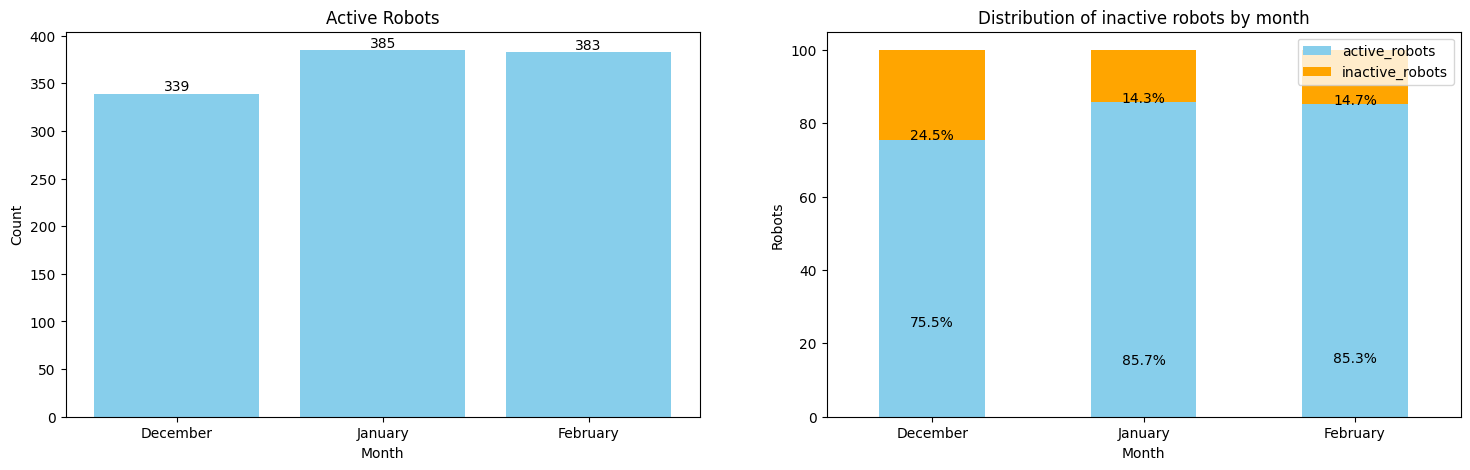

In [407]:
## Crear un gráfico que muestre el número de robots sobre tiempo

# Calcular porcentajes
robot_and_date = df[['date', 'robot']]
count_robots = robot_and_date.groupby('date').count()
all_robots = robot_and_date.nunique()
percent_active_robots = round(100 * count_robots / all_robots.robot, 1)
percent_inactive_robots = 100 - percent_active_robots
percent_active_robots = percent_active_robots.rename(columns = {'robot': 'active_robots'})
percent_inactive_robots = percent_inactive_robots.rename(columns = {'robot': 'inactive_robots'})
concatenated_df = pd.concat([percent_active_robots, percent_inactive_robots], axis=1)
concatenated_df.index = concatenated_df.index.strftime('%B')

# Crear gráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

axes[0].bar(count_robots.index.strftime('%B'), count_robots['robot'], color='skyblue')
axes[0].set_title('Active Robots')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Count')

concatenated_df.plot(kind='bar', stacked=True, ax=axes[1], color=['skyblue', 'orange'])
axes[1].set_xticklabels(concatenated_df.index, rotation=0)
axes[1].set_title('Distribution of inactive robots by month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Robots')

for bar in axes[0].patches:
    bar_value = f"{bar.get_height()}"
    axes[0].text(bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            bar_value,
            ha='center',
            va='bottom')

for bar in axes[1].patches:
    bar_value = f"{bar.get_height():.1f}%"
    axes[1].text(bar.get_x() + bar.get_width() / 2,
            100 - bar.get_height(),
            bar_value,
            ha='center'
            )

El número de robots inactivos en Diciembre representó el 24%, mientras que en los meses de Enero y Febrero representó el 14% del total de la flota. En números absolutos, fueron 110, 64 y 66 robots que no estuvieron en funcionamiento en los meses de Diciembre, Enero y Febrero respectivamente.

<ipython-input-408-27f4094cfc2a>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(count_robot.index, rotation=60, ha='right')


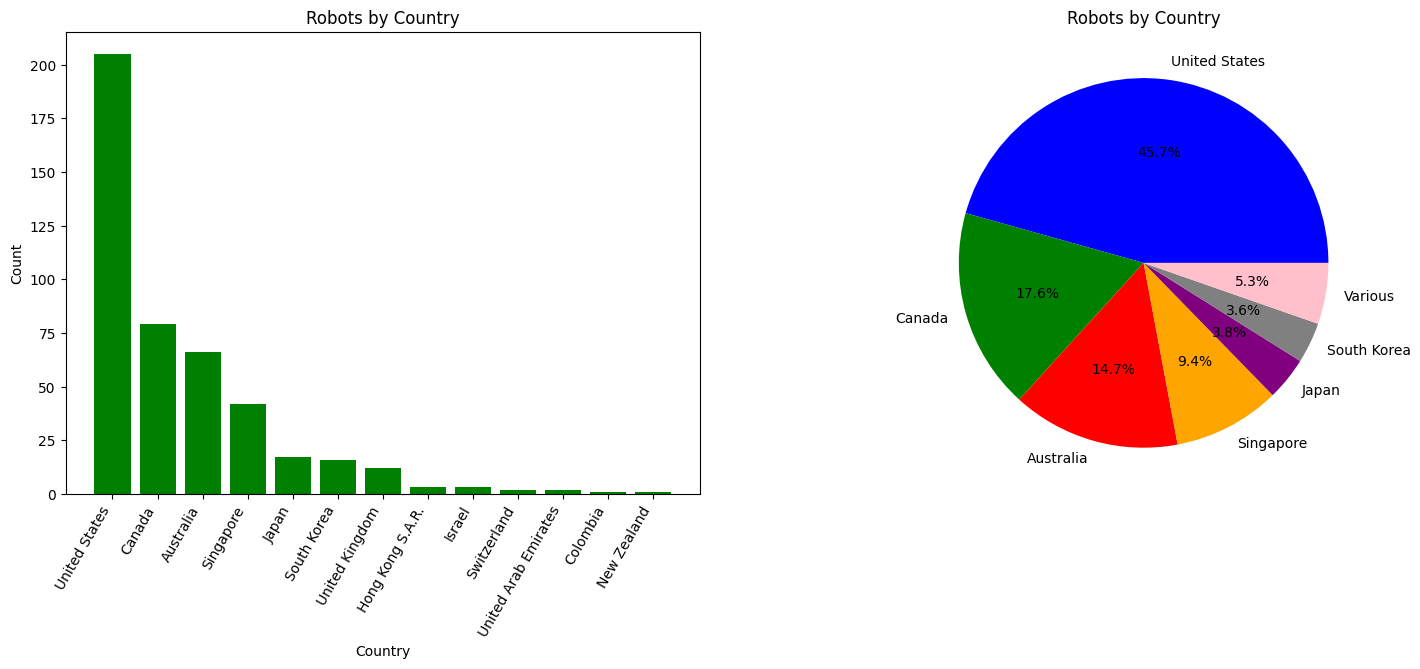

In [408]:
# Crear un gráfico de barras y uno de pastel de la variable 'country'
visible_variables = 6

df_groups = df.groupby(['country', 'robot'])['date'].count().reset_index()
count_robot = df_groups.groupby(['country'])['robot'].count()
count_robot = count_robot.sort_values(ascending=False)

data_counts = count_robot

top_categories = data_counts.head(visible_variables)
various_count = data_counts[visible_variables:].sum()

top_categories['Various'] = various_count

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

axes[0].bar(count_robot.index, count_robot.values, color = 'green')
axes[0].set_title('Robots by Country')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Count')

axes[0].set_xticklabels(count_robot.index, rotation=60, ha='right')

colors = ['blue', 'green', 'red', 'orange', 'purple', 'gray', 'pink']

axes[1].pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', colors = colors)
axes[1].set_title('Robots by Country')
plt.show()

Los robots dentro de 'United States', 'Canada' y 'Australia' representan más de 75% del total de los robots y sólo dentro de los 'United States' son casi la mitad del total de la flota durante los tres meses de Diciembre a Febrero.
Esto es importante debido a que se asume que la cultura del país influye en las formas de uso de los robots. Por ej. robots localizados en los US son manejados por inmigrantes que no manejan el inglés por lo que podría existir menor tolerancia de los usuarios a los fallos de los robots. Se pasará a analizar si el país influye en el número de robots inactivos.

In [409]:
# Eliminar dato asociado a Colombia

df = df[df['country'] != 'Colombia']

En el dataset nos encontramos un dato asociado a Colombia, este robot al ser de prueba fue eliminado del dataset.

In [410]:
# Generar pivot table para dividir la información por mes

values = ['covered_area']

df_pivoted = df.pivot(index = [
    'robot'
    , 'location'
    , 'country'
    , 'category'
    ]
    , columns = ['date']
    , values = values).reset_index()

new_column_names = ['robot', 'location', 'country', 'category']

months = [
    '_dec'
    , '_jan'
    , '_feb'
    ]

for value in values:
  for month in months:
    new_column_names.append(value + month)

df_pivoted.columns = new_column_names
df_pivoted.head()

,robot,location,country,category,covered_area_dec,covered_area_jan,covered_area_feb
0,1000,1763,Canada,warehouse,NaN,26684.05,30461.12
1,1002,1780,United States,warehouse,56249.88,3953.93,NaN
2,1003,1777,United States,warehouse,57248.95,6174.39,7639.06
3,1004,1777,United States,warehouse,63091.84,NaN,37732.70
4,1005,1690,United States,warehouse,NaN,5562.14,35036.44


Se generó una pivot table con la información dividida por mes. Se utilizó la variable 'covered area' que posteriormente se cambiará a una columna falso/verdadero para indicar si un robot estuvo activo en el mes, de esta manera, es más fácil comparar la actividad del robot en este análisis inicial.

In [411]:
# Cambiar el nombre de las columnas y definir verdadero/falso en función de su actividad

for value in values:
  for month in months:
    df_pivoted[value + month] = df_pivoted[value + month].apply(lambda x: True if x > 0 else False)
    df_pivoted = df_pivoted.rename(columns = {value + month: 'active' + month})
df_pivoted.head()

,robot,location,country,category,active_dec,active_jan,active_feb
0,1000,1763,Canada,warehouse,False,True,True
1,1002,1780,United States,warehouse,True,True,False
2,1003,1777,United States,warehouse,True,True,True
3,1004,1777,United States,warehouse,True,False,True
4,1005,1690,United States,warehouse,False,True,True


In [412]:
# Calcular robots inactivos por mes y por país

inactive_dec = df_pivoted[~df_pivoted['active_dec']]
robot_and_country_dec = inactive_dec[['robot', 'country']]
inactive_country_dec = robot_and_country_dec.groupby('country').count()
inactive_country_dec = inactive_country_dec.rename(columns = {'robot': 'december'})
inactive_jan = df_pivoted[~df_pivoted['active_jan']]
robot_and_country_jan = inactive_jan[['robot', 'country']]
inactive_country_jan = robot_and_country_jan.groupby('country').count()
inactive_country_jan = inactive_country_jan.rename(columns = {'robot': 'january'})
inactive_feb = df_pivoted[~df_pivoted['active_feb']]
robot_and_country_feb = inactive_feb[['robot', 'country']]
inactive_country_feb = robot_and_country_feb.groupby('country').count()
inactive_country_feb = inactive_country_feb.rename(columns = {'robot': 'february'})
inactive_by_country = pd.concat([inactive_country_dec, inactive_country_jan, inactive_country_feb], axis=1)
inactive_by_country = inactive_by_country.reset_index(drop=False)
inactive_by_country.head()

,country,december,january,february
0,Australia,12,4.0,6
1,Canada,18,13.0,9
2,Hong Kong S.A.R.,1,1.0,1
3,Japan,2,4.0,2
4,Singapore,14,3.0,8


In [413]:
# Calcular porcentaje de robots inactivos por mes y por país

df_groups = df.groupby(['country', 'robot'])['date'].count().reset_index()
count_robot = df_groups.groupby(['country'])['robot'].count().reset_index()

merged_df = pd.merge(count_robot, inactive_by_country, on='country', how='outer')
merged_df = merged_df.fillna(0)

merged_df_with_percentages = merged_df
merged_df_with_percentages['percent_december'] = round(100 * merged_df['december'] / merged_df['robot'], 1)
merged_df_with_percentages['percent_january'] = round(100 * merged_df['january'] / merged_df['robot'], 1)
merged_df_with_percentages['percent_february'] = round(100 * merged_df['february'] / merged_df['robot'], 1)
merged_df_with_percentages = merged_df_with_percentages.drop(['robot', 'december', 'january', 'february'], axis=1)
merged_df_with_percentages = merged_df_with_percentages.rename(columns = {
    'percent_december': 'december'
    , 'percent_january': 'january'
    , 'percent_february': 'february'
    })
merged_df_with_percentages.head()

,country,december,january,february
0,Australia,18.2,6.1,9.1
1,Canada,22.8,16.5,11.4
2,Hong Kong S.A.R.,33.3,33.3,33.3
3,Israel,0.0,0.0,0.0
4,Japan,11.8,23.5,11.8


<ipython-input-414-4e2bd448301e>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)


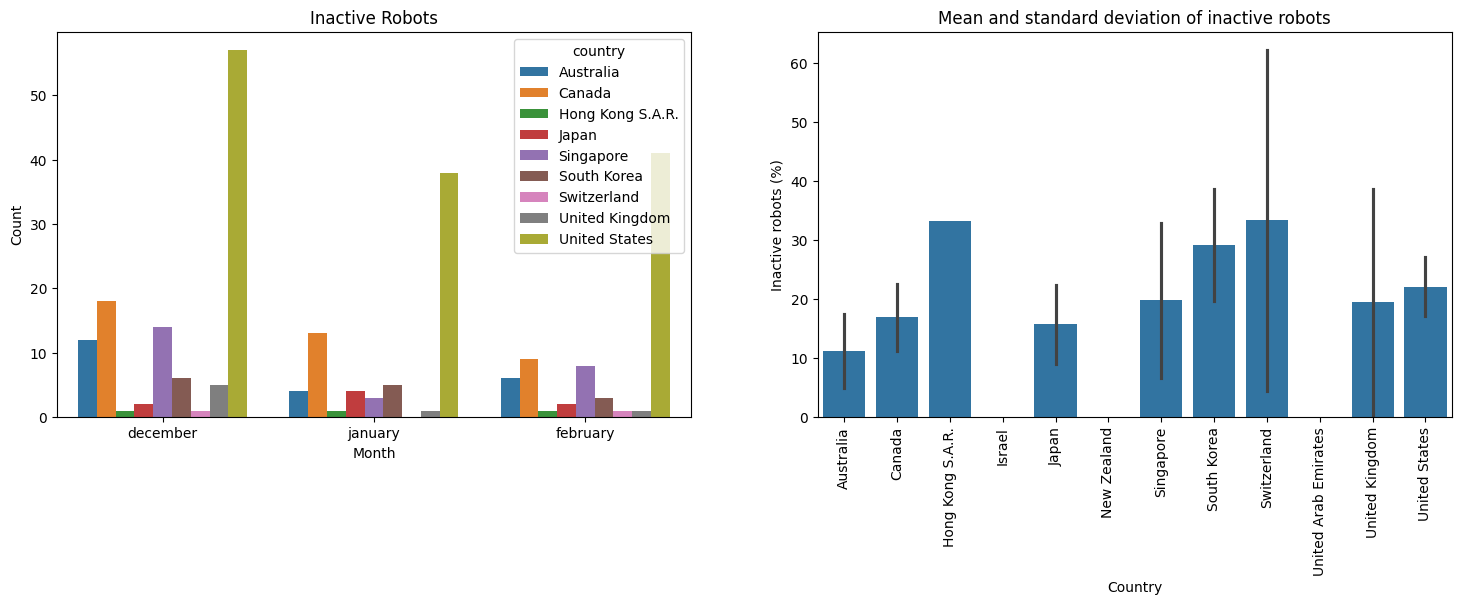

In [414]:
# Graficar los datos de número robots inactivos por país
melted_df_absolute = pd.melt(inactive_by_country, id_vars='country', var_name='month', value_name='inactive')
melted_df_percent = pd.melt(merged_df_with_percentages, id_vars='country', var_name='month', value_name='inactive')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

sns.barplot(x='month', y='inactive', hue='country', data=melted_df_absolute, ax=axes[0])
axes[0].set_title('Inactive Robots')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Count')

sns.barplot(x='country', y='inactive', data=melted_df_percent, ax=axes[1], estimator = 'mean', errorbar = 'sd')
axes[1].set_title('Mean and standard deviation of inactive robots')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Inactive robots (%)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
plt.show()

Se puede observar como los países de Israel, United Arab Emirates y New Zealand no registran robots sin utilizar. En Switzerland, United Kingdom y Singapore existe una alta desviación estandar, y por tanto, una alta dispersión alrededor de la media. El uso de los robots en estos países cambió de manera importante dentro de estos tres meses.

<ipython-input-415-b47739cb0b26>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(count_robot.index, rotation=60, ha='right')


Text(0.5, 1.0, 'Robots by Category')

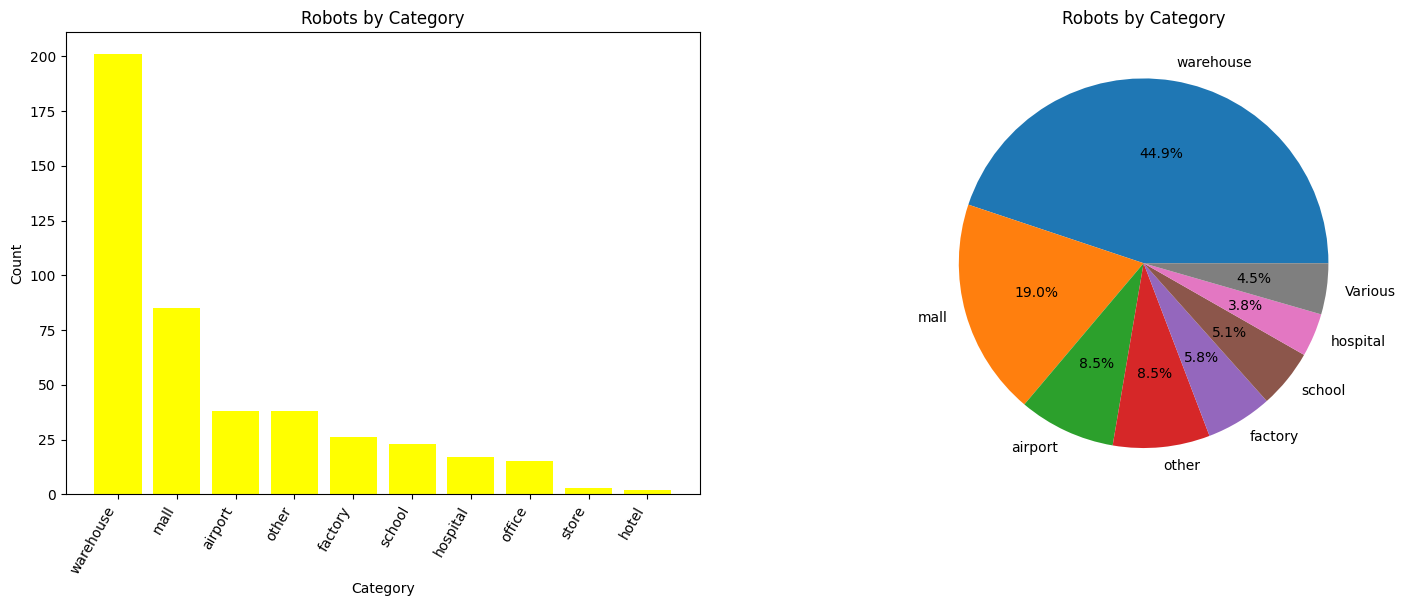

In [415]:
# Crear un gráfico de barras y uno de pastel de la variable 'category'
visible_variables = 7

df_groups = df.groupby(['category', 'robot'])['date'].count().reset_index()
count_robot = df_groups.groupby(['category'])['robot'].count()
count_robot = count_robot.sort_values(ascending=False)

data_counts = count_robot

top_categories = data_counts.head(visible_variables)
various_count = data_counts[visible_variables:].sum()

top_categories['Various'] = various_count

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

axes[0].bar(count_robot.index, count_robot.values, color = 'yellow')
axes[0].set_title('Robots by Category')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Count')

axes[0].set_xticklabels(count_robot.index, rotation=60, ha='right')

axes[1].pie(top_categories, labels=top_categories.index, autopct='%1.1f%%')
axes[1].set_title('Robots by Category')

Los robots dentro de 'warehouse', 'mall', 'airport' y aquellos categorizados como 'other' representan más de 75% del total de los robots. Los robots localizados en 'warehouse' representan casi la mitad del total de la flota.
En este caso, existen diferencias marcadas entre categorías, por ej. Los espacios de los 'warehouse' debido a su gran tamaño suelen ocasionar más problemas al sistema de localización del robot mientras que los espacios de 'mall' y 'airport' suelen ser transitados en ciertas horas del día por muchas personas por lo que suponen un reto tanto en el sistema de navegación como en el sistema de localización. Para este caso, asumiremos que este factor influye dentro de los hábitos de uso de los robots.

## Análisis multivariado

<ipython-input-416-1c72c624d969>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_mat = df_for_correlation.corr()


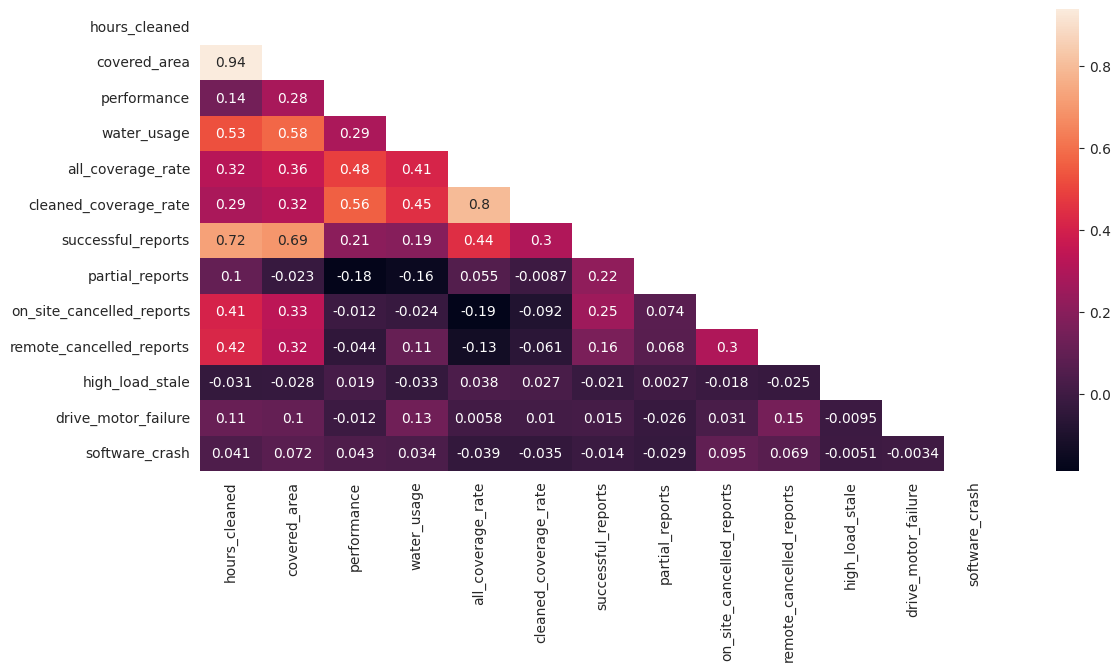

In [416]:
# Crear matriz de correlación
df_for_correlation = df.drop(['robot', 'location'], axis=1)
correlation_mat = df_for_correlation.corr()
mask = np.zeros_like(correlation_mat)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13,6))
    ax = sns.heatmap(correlation_mat,
mask=mask,annot=True)

Se puede observar una alta correlación entre:
* hours_cleaned y covered_area: Tiene sentido debido a que mientras más horas de operación tiene el robot, más área logra cubrir en ese tiempo.
* all_coverage_rate y cleaned_coverage_rate: Debido a que ámbas se calculan de forma similar salvo con unas variaciones, esto podría indicar que solo una de estas variables es necesaria para este análisis.
* hours_cleaned y successful_reports: Existe una relación entre un reporte exitoso y el número de horas utilizadas.

Text(0.5, 1.0, 'hours_cleaned vs covered_area by country')

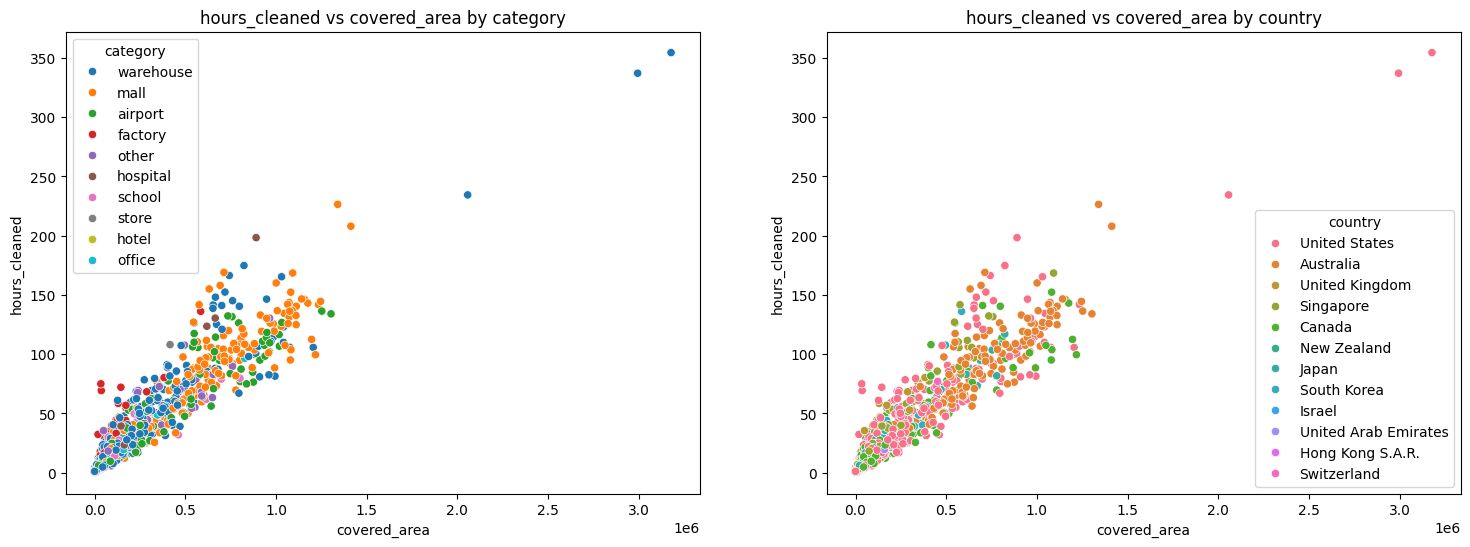

In [417]:
# Create gráficos de dispersión para comparar hours_cleaned vs covered_area
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Scatter plot on the first subplot
sns.scatterplot(data=df, x="covered_area", y="hours_cleaned", hue="category", ax=axes[0])
axes[0].set_title('hours_cleaned vs covered_area by category')

# Scatter plot on the second subplot
sns.scatterplot(data=df, x="covered_area", y="hours_cleaned", hue="country", ax=axes[1])
axes[1].set_title('hours_cleaned vs covered_area by country')


In [418]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

print("***R^2 score depending of the country***")

countries = np.unique(df['country'])

for country in countries:

  df_by_country = df[df['country'] == country]
  X = df_by_country[["covered_area"]]
  y = df_by_country["hours_cleaned"]

  # Instantiate the linear regression model
  model = LinearRegression()

  # Fit the model to your data
  model.fit(X, y)

  # Predict the target variable
  y_pred = model.predict(X)

  # Calculate R^2
  r2 = r2_score(y, y_pred)

  print("R^2 Score:", round(r2, 2), 'for', country)

categories = np.unique(df['category'])

print("\n***R^2 score depending of the category***")

for category in categories:

  df_by_category = df[df['category'] == category]
  X = df_by_category[["covered_area"]]
  y = df_by_category["hours_cleaned"]

  # Instantiate the linear regression model
  model = LinearRegression()

  # Fit the model to your data
  model.fit(X, y)

  # Predict the target variable
  y_pred = model.predict(X)

  # Calculate R^2
  r2 = r2_score(y, y_pred)

  print("R^2 Score:", round(r2, 2), 'for', category)

***R^2 score depending of the country***
R^2 Score: 0.86 for Australia
R^2 Score: 0.84 for Canada
R^2 Score: 0.92 for Hong Kong S.A.R.
R^2 Score: 0.91 for Israel
R^2 Score: 0.93 for Japan
R^2 Score: 0.99 for New Zealand
R^2 Score: 0.95 for Singapore
R^2 Score: 0.74 for South Korea
R^2 Score: 1.0 for Switzerland
R^2 Score: 0.79 for United Arab Emirates
R^2 Score: 0.87 for United Kingdom
R^2 Score: 0.86 for United States

***R^2 score depending of the category***
R^2 Score: 0.84 for airport
R^2 Score: 0.66 for factory
R^2 Score: 0.97 for hospital
R^2 Score: 0.89 for hotel
R^2 Score: 0.87 for mall
R^2 Score: 0.96 for office
R^2 Score: 0.87 for other
R^2 Score: 0.82 for school
R^2 Score: 0.98 for store
R^2 Score: 0.88 for warehouse


En otras palabras, esto indica que si existe una correlación en todos los países, sin embargo esta suele ser menor en 'South Korea' y 'United Arab Emirates'. Por otro lado, en el caso de las categorías de las locaciones, la correlación es más baja en 'factory' mientras que en las demás categorías es muy alta.

Por tal razón se decide eliminar la variable "hours_cleaned" del dataframe para evitar los efectos de la multicolinearidad.



In [419]:
df = df.drop(['hours_cleaned'], axis = 1)

## Análisis de outliers

In [420]:
# Análisis de outliers numéricos
numeric_features = numeric_features[numeric_features != 'hours_cleaned']
numeric_features

Index(['covered_area', 'performance', 'water_usage', 'all_coverage_rate',
       'cleaned_coverage_rate', 'successful_reports', 'partial_reports',
       'on_site_cancelled_reports', 'remote_cancelled_reports',
       'high_load_stale', 'drive_motor_failure', 'software_crash'],
      dtype='object')

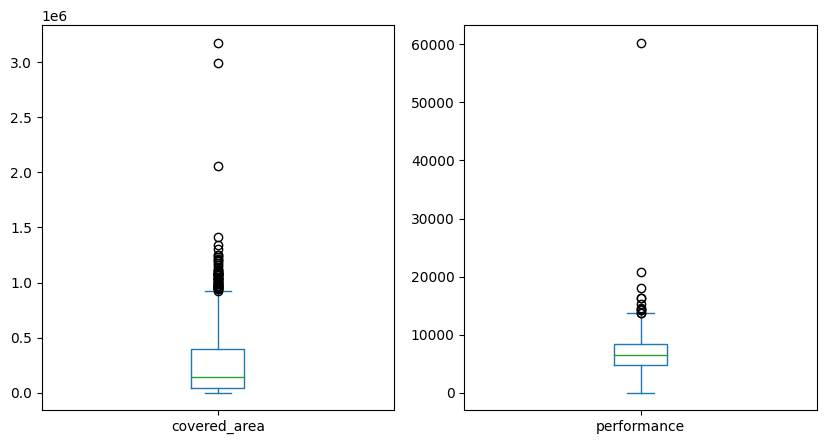

In [421]:
# Boxplots de las variables numéricas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
df[['covered_area', 'performance']].plot.box(subplots=True, ax=axes)
plt.show()

Se considera que el covered_area y el performance tienen outliers significativamente altos por lo que se pasa a confirmar con el histograma la dispersión de estos datos.

<ipython-input-386-91552ea8a306>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)
<ipython-input-386-91552ea8a306>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(axs[0].get_xticklabels(), rotation=45)


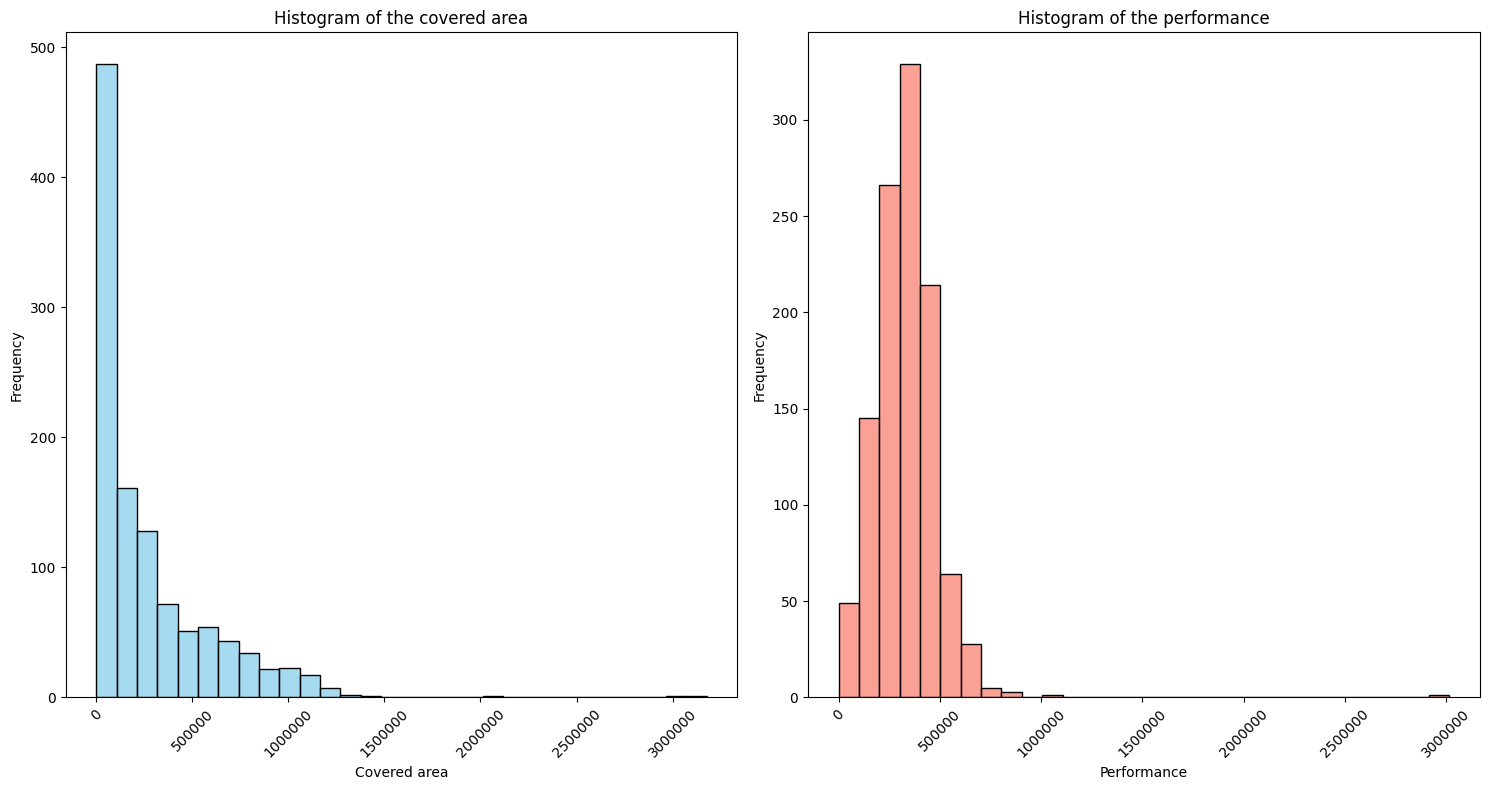

In [386]:
import plotly.express as px
import plotly.graph_objects as go

# Graficar el covered area y el performance para ver valores atípicos

# Create figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# Plot first histogram using Seaborn
sns.histplot(data=df['covered_area'], bins=30, color='skyblue', edgecolor='black', ax=axs[0])
axs[0].set_title('Histogram of the covered area')
axs[0].set_xlabel('Covered area')
axs[0].set_ylabel('Frequency')

# Plot second histogram using Seaborn
sns.histplot(data=df['performance'], bins=30, color='salmon', edgecolor='black', ax=axs[1])
axs[1].set_title('Histogram of the performance')
axs[1].set_xlabel('Performance')
axs[1].set_ylabel('Frequency')

# Disable scientific notation
for ax in axs:
    ax.ticklabel_format(style='plain', axis='both')

axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)
axs[1].set_xticklabels(axs[0].get_xticklabels(), rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

En ambas variables se observa en los extremos la existencia de estos valores atípicos por lo que se pasa a definir la función para eliminarlos con base al IQR.

In [387]:
#Función para calcular IQR

def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[ ((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR))) ]
   return outliers

# Crera una función para para encontrar outliers con  IQR

def drop_outliers_IQR(df):

   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1

   # No outliers
   not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   # datos limpios
   outliers_clean = not_outliers.dropna().reset_index()

   return outliers_clean

In [388]:
# Encontramos outliers para covered area

outliers = find_outliers_IQR(df['covered_area'])

print('número de outliers: '+ str(len(outliers)))
print('max valor outlier: ' + str(outliers.max()))
print('min valor outlier: ' + str(outliers.min()))

print(outliers)

número de outliers: 60
max valor outlier: 3178178.43
min valor outlier: 926020.49
17      1018464.78
49      1205281.45
125     1076603.45
131      986954.22
142      985266.00
149     1091983.16
151      971893.43
183     1111640.29
203     1340250.71
258     1157965.10
276     1044972.72
280     2056878.16
281     1001116.30
296     1098424.41
346     2993968.98
359     1303290.60
417     1081310.31
432      936707.32
435      992259.29
448     1017137.45
488      926020.49
496     1196408.57
527      994571.57
539     1041766.93
572     1007062.28
573     1234103.36
590      989864.12
610      939726.48
623     1175298.57
643     1030657.12
653      947086.17
676      968041.29
677      965924.40
682     1028767.00
683     1082626.07
699     3178178.43
709     1252449.78
711     1041226.80
726     1072917.42
740     1217710.53
763      948347.07
789     1111191.30
815     1071965.65
870      963162.38
892      964857.05
908      961278.50
922     1064521.53
931      948890.65
936   

In [389]:
# Eliminamos outliers para covered area

outliers_clean = drop_outliers_IQR(df['covered_area'])

print('number of outliers: '+ str(len(outliers_clean)))
print('max outlier value: ' + str(outliers_clean.max()))
print('min outlier value: ' + str(outliers_clean.min()))

print(outliers_clean)

number of outliers: 1045
max outlier value: index             1106.00
covered_area    920999.96
dtype: float64
min outlier value: index           0.0
covered_area    0.0
dtype: float64
      index  covered_area
0         0     229559.64
1         1     680787.20
2         2     103129.09
3         3     371158.81
4         4      73258.40
...     ...           ...
1040   1102      44391.97
1041   1103          0.00
1042   1104     247052.56
1043   1105     250978.88
1044   1106      74625.90

[1045 rows x 2 columns]


In [390]:
# Encontramos outliers para performance

outliers = find_outliers_IQR(df['performance'])

print('número de outliers: '+ str(len(outliers)))
print('max valor outlier: ' + str(outliers.max()))
print('min valor outlier: ' + str(outliers.min()))

print(outliers)

número de outliers: 12
max valor outlier: 60302.57
min valor outlier: 13736.3
10      60302.57
190     14181.00
220     14156.96
277     16220.53
382     14386.43
637     14508.74
660     13736.30
688     16266.53
712     17998.35
854     20724.21
901     15191.13
1039    13750.60
Name: performance, dtype: float64


In [391]:
# Eliminamos outliers para performance

outliers_clean = drop_outliers_IQR(df['performance'])

print('number of outliers: '+ str(len(outliers_clean)))
print('max outlier value: ' + str(outliers_clean.max()))
print('min outlier value: ' + str(outliers_clean.min()))

print(outliers_clean)

number of outliers: 1093
max outlier value: index           1106.0
performance    13652.2
dtype: float64
min outlier value: index          0.0
performance    0.0
dtype: float64
      index  performance
0         0      4772.80
1         1      6737.42
2         2      6826.58
3         3      8615.21
4         4      3333.19
...     ...          ...
1088   1102      8652.44
1089   1103         0.00
1090   1104      9515.47
1091   1105      6047.31
1092   1106      4321.91

[1093 rows x 2 columns]


Posterior a la eliminación de los datos atípicos, se procede a realizar la preparación de los datos.

# Preparación de datos

Ya que se tiene una columna de tiempo 'date', se generará una pivot table para generar una columna por mes, de esta manera, poder procesar la data a través de un modelo de regresión.

In [422]:
# Generar pivot table para dividir la información por mes

values = [
    'covered_area'
    , 'performance'
    , 'water_usage'
    , 'all_coverage_rate'
    , 'successful_reports'
    , 'partial_reports'
    , 'on_site_cancelled_reports'
    , 'remote_cancelled_reports'
    , 'high_load_stale'
    , 'drive_motor_failure'
    , 'software_crash'
    ]

df_pivoted = df.pivot(index = [
    'robot'
    , 'location'
    , 'country'
    , 'category'
    ]
    , columns = ['date']
    , values = values).reset_index()

new_column_names = ['robot', 'location', 'country', 'category']

for value in values:
  new_column_names.append(value + '_dec')
  new_column_names.append(value + '_jan')
  new_column_names.append(value + '_feb')

df_pivoted.columns = new_column_names
df_pivoted.head()

,robot,location,country,category,covered_area_dec,covered_area_jan,covered_area_feb,performance_dec,performance_jan,performance_feb,...,remote_cancelled_reports_feb,high_load_stale_dec,high_load_stale_jan,high_load_stale_feb,drive_motor_failure_dec,drive_motor_failure_jan,drive_motor_failure_feb,software_crash_dec,software_crash_jan,software_crash_feb
0,1000,1763,Canada,warehouse,NaN,26684.05,30461.12,NaN,2562.43,2810.38,...,5.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,3.0,5.0
1,1002,1780,United States,warehouse,56249.88,3953.93,NaN,5795.16,8333.11,NaN,...,NaN,0.0,0.0,NaN,8.0,0.0,NaN,0.0,2.0,NaN
2,1003,1777,United States,warehouse,57248.95,6174.39,7639.06,4441.09,9031.89,8242.34,...,1.0,0.0,0.0,0.0,24.0,0.0,0.0,33.0,9.0,38.0
3,1004,1777,United States,warehouse,63091.84,NaN,37732.70,5939.30,NaN,5092.06,...,3.0,0.0,NaN,0.0,0.0,NaN,0.0,2.0,NaN,1.0
4,1005,1690,United States,warehouse,NaN,5562.14,35036.44,NaN,9280.97,8148.40,...,1.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,472.0,64723.0


In [423]:
# Borrar las columnas innecesarias: Debido a que se quiere predecir el covered area en el mes de Febrero (área cubierta en pies cuadrados), toda la información del mes de febrero se borra

df_filtered = df_pivoted
for value in values:
  if value + '_feb' != 'covered_area_feb':
    df_filtered = df_filtered.drop([value + '_feb'], axis=1)
df_filtered.head()

,robot,location,country,category,covered_area_dec,covered_area_jan,covered_area_feb,performance_dec,performance_jan,water_usage_dec,...,on_site_cancelled_reports_dec,on_site_cancelled_reports_jan,remote_cancelled_reports_dec,remote_cancelled_reports_jan,high_load_stale_dec,high_load_stale_jan,drive_motor_failure_dec,drive_motor_failure_jan,software_crash_dec,software_crash_jan
0,1000,1763,Canada,warehouse,NaN,26684.05,30461.12,NaN,2562.43,NaN,...,NaN,4.0,NaN,1.0,NaN,0.0,NaN,0.0,NaN,3.0
1,1002,1780,United States,warehouse,56249.88,3953.93,NaN,5795.16,8333.11,17.68,...,3.0,1.0,1.0,0.0,0.0,0.0,8.0,0.0,0.0,2.0
2,1003,1777,United States,warehouse,57248.95,6174.39,7639.06,4441.09,9031.89,22.98,...,2.0,0.0,2.0,0.0,0.0,0.0,24.0,0.0,33.0,9.0
3,1004,1777,United States,warehouse,63091.84,NaN,37732.70,5939.30,NaN,23.18,...,2.0,NaN,4.0,NaN,0.0,NaN,0.0,NaN,2.0,NaN
4,1005,1690,United States,warehouse,NaN,5562.14,35036.44,NaN,9280.97,NaN,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,472.0


In [424]:
# Crear una nueva columna que represente robots inutilizados en febrero
df_filtered['covered_area_feb'] = ~df_filtered['covered_area_feb'].notnull()

df_filtered = df_filtered.rename(columns = {
    'covered_area_feb': 'unemployed_robot_in_feb'
    })

df_filtered.head()

,robot,location,country,category,covered_area_dec,covered_area_jan,unemployed_robot_in_feb,performance_dec,performance_jan,water_usage_dec,...,on_site_cancelled_reports_dec,on_site_cancelled_reports_jan,remote_cancelled_reports_dec,remote_cancelled_reports_jan,high_load_stale_dec,high_load_stale_jan,drive_motor_failure_dec,drive_motor_failure_jan,software_crash_dec,software_crash_jan
0,1000,1763,Canada,warehouse,NaN,26684.05,False,NaN,2562.43,NaN,...,NaN,4.0,NaN,1.0,NaN,0.0,NaN,0.0,NaN,3.0
1,1002,1780,United States,warehouse,56249.88,3953.93,True,5795.16,8333.11,17.68,...,3.0,1.0,1.0,0.0,0.0,0.0,8.0,0.0,0.0,2.0
2,1003,1777,United States,warehouse,57248.95,6174.39,False,4441.09,9031.89,22.98,...,2.0,0.0,2.0,0.0,0.0,0.0,24.0,0.0,33.0,9.0
3,1004,1777,United States,warehouse,63091.84,NaN,False,5939.30,NaN,23.18,...,2.0,NaN,4.0,NaN,0.0,NaN,0.0,NaN,2.0,NaN
4,1005,1690,United States,warehouse,NaN,5562.14,False,NaN,9280.97,NaN,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,472.0


In [425]:
df = df_filtered

Se termina con la asignación de la pivot table al dataframe df.

## Imputación de valores

Con la nueva pivot table generada, existen instancias de la tabla para los que los robots no generaron datos (los robots no estuvieron en operación en determinado mes), por tal razón, estos valores nulos deberán ser imputados con cero.

In [426]:
# Verificar valores perdidos
df.isna().sum()

robot                              0
location                           0
country                            0
category                           0
covered_area_dec                 110
covered_area_jan                  63
unemployed_robot_in_feb            0
performance_dec                  110
performance_jan                   63
water_usage_dec                  110
water_usage_jan                   63
all_coverage_rate_dec            110
all_coverage_rate_jan             63
successful_reports_dec           110
successful_reports_jan            63
partial_reports_dec              110
partial_reports_jan               63
on_site_cancelled_reports_dec    110
on_site_cancelled_reports_jan     63
remote_cancelled_reports_dec     110
remote_cancelled_reports_jan      63
high_load_stale_dec              110
high_load_stale_jan               63
drive_motor_failure_dec          110
drive_motor_failure_jan           63
software_crash_dec               110
software_crash_jan                63
d

In [427]:
# Reemplazar valores nulos por cero

for value in values:
  columna = value + '_dec'
  df[columna].replace(np.nan, 0, inplace=True)
  columna = value + '_jan'
  df[columna].replace(np.nan, 0, inplace=True)

In [428]:
df.isna().sum()

robot                            0
location                         0
country                          0
category                         0
covered_area_dec                 0
covered_area_jan                 0
unemployed_robot_in_feb          0
performance_dec                  0
performance_jan                  0
water_usage_dec                  0
water_usage_jan                  0
all_coverage_rate_dec            0
all_coverage_rate_jan            0
successful_reports_dec           0
successful_reports_jan           0
partial_reports_dec              0
partial_reports_jan              0
on_site_cancelled_reports_dec    0
on_site_cancelled_reports_jan    0
remote_cancelled_reports_dec     0
remote_cancelled_reports_jan     0
high_load_stale_dec              0
high_load_stale_jan              0
drive_motor_failure_dec          0
drive_motor_failure_jan          0
software_crash_dec               0
software_crash_jan               0
dtype: int64

Se culmina con la imputación de las variables de la pivot table.

## Feature Engineering

En este proceso, añadiremos variables construidas a partir de las variables originales utilizando one hot encoder.

Las variables a las que se les aplicará el OneHotEncoder son 'country' y 'category'.

In [429]:
# One-Hot Encoding para 'country'
one_hot_encoded = pd.get_dummies(df['country'])

# Concatenar resultado al dataframe original
df_encoded = pd.concat([df, one_hot_encoded], axis=1)

# One-Hot Encoding para 'category'
one_hot_encoded = pd.get_dummies(df['category'])

# Concatenar resultado al dataframe original
df_encoded = pd.concat([df_encoded, one_hot_encoded], axis=1)

df_improved = df_encoded.drop(['country', 'category'], axis = 1)

df_improved.head()

,robot,location,covered_area_dec,covered_area_jan,unemployed_robot_in_feb,performance_dec,performance_jan,water_usage_dec,water_usage_jan,all_coverage_rate_dec,...,airport,factory,hospital,hotel,mall,office,other,school,store,warehouse
0,1000,1763,0.00,26684.05,False,0.00,2562.43,0.00,8.28,0.00,...,0,0,0,0,0,0,0,0,0,1
1,1002,1780,56249.88,3953.93,True,5795.16,8333.11,17.68,6.58,68.55,...,0,0,0,0,0,0,0,0,0,1
2,1003,1777,57248.95,6174.39,False,4441.09,9031.89,22.98,20.39,57.71,...,0,0,0,0,0,0,0,0,0,1
3,1004,1777,63091.84,0.00,False,5939.30,0.00,23.18,0.00,39.36,...,0,0,0,0,0,0,0,0,0,1
4,1005,1690,0.00,5562.14,False,0.00,9280.97,0.00,6.23,0.00,...,0,0,0,0,0,0,0,0,0,1


Se puede verificar la codificación de las variables al final del dataframe.

# Algoritmo básico

Finalmente, en este punto se procederá a entrenar un modelo de árbol de decisión con las columnas anteriormente procesadas de covered_area, performance, country y category.

In [430]:
country_list = list(df['country'].unique())
category_list = list(df['category'].unique())
metrics_list = ['covered_area_dec', 'covered_area_jan', 'performance_dec', 'performance_jan']
columns_name = country_list + category_list + metrics_list
X = df_improved[columns_name]
y = df_improved['unemployed_robot_in_feb']

In [431]:
# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# Entrenar el modelo
model = tree.DecisionTreeRegressor()

model.fit(X_train, y_train)

# Evaluar el modelo

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2) Score:", r2)

Mean Absolute Error (MAE): 0.19774774774774775
Mean Squared Error (MSE): 0.19606606606606608
Root Mean Squared Error (RMSE): 0.44279348015306874
R-squared (R^2) Score: -0.610285380994043


El algoritmo de árboles de desición en combinación a las variables seleccionadas no predice de manera correcta los robots sin utilizar. De hecho, al tener un R^2 negativo, esto indica que el modelo predice "peor" que una linea horizontal (hipótesis nula).

# Conclusiones

1. Como parte del análisis exploratorio se encontró que el número de 'hours_cleaned' están altamente correlacionados con 'covered_area' por lo que para futuros análisis se puede utilizar sólo uno de ellos para realizar predicciones de datos.
2. Se notaron diferencias en el uso de los robots de acuerdo al mes. Diciembre notó una baja en el uso de los robots en comparación a Enero y Febrero.
3. De igual forma, se notaron diferencias en el uso de los robots de acuerdo al país. En algunos de ellos, los robots fueron utilizados constantemente a lo largo del trimestre mientras que otros no tuvieron la misma constancia.
4. Un modelo de árboles de decisión junto con las variables de 'covered_area', 'performance', 'category' y 'country' no pudo predecir si un robot sería utilizado en el último mes. Como parte de trabajos futuros se propone utilizar un rango mayor de tiempo (6 meses, 1 año o más).
5. Finalmente, variables que no se estudiaron de manera directa en este documento como los fallos de los robots o el número de reportes de limpieza cancelados se proponen para un análisis posterior.